#### Importing Required Libraries: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pymatgen.core as pg
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

#### 1. Data Analysis and Feature Engineering

In [2]:
df = pd.read_excel('Data/Training/Features.xlsx') ## Import the training dataset
df.columns

Index(['Compound', 'Temperature(K)', 'mean_EffectiveCoordination',
       'var_EffectiveCoordination', 'min_EffectiveCoordination',
       'max_EffectiveCoordination', 'var_MeanBondLength', 'min_MeanBondLength',
       'max_MeanBondLength', 'mean_BondLengthVariation',
       ...
       'max_SpaceGroupNumber', 'min_SpaceGroupNumber', 'most_SpaceGroupNumber',
       'frac_sValence', 'frac_pValence', 'frac_dValence', 'frac_fValence',
       'CanFormIonic', 'MaxIonicChar', 'MeanIonicChar'],
      dtype='object', length=273)

#### Importing LTC vs Temperature Data:

In [3]:
Y = pd.read_excel('Data/Training/Initial Dataset.xlsx')
Y

,Compound,LTC,Temperature(K)
0,AlAs,266.67806,152.91209
1,AlAs,220.88175,159.37363
2,AlAs,175.08544,185.21978
3,AlAs,129.28913,211.06593
4,AlAs,106.39098,243.37363
...,...,...,...
2140,TlI,0.05528,751.19048
2141,TlI,0.04856,818.19728
2142,TlI,0.04184,885.20408
2143,TlI,0.04184,952.21088


#### We can observe from histogram plot below that distribution of LTC values is skewed when plotted

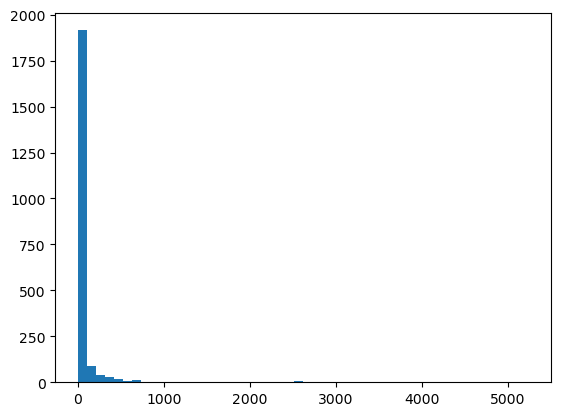

In [4]:
plt.hist(Y['LTC'],bins=50);

#### Making combined training dataset: Merging LTC data at various temperature with features of alloys

In [5]:
df.drop(['Temperature(K)'],axis = 1, inplace=True)

In [6]:
data_full = pd.merge(df,Y,on='Compound')
data_full 

,Compound,mean_EffectiveCoordination,var_EffectiveCoordination,min_EffectiveCoordination,max_EffectiveCoordination,var_MeanBondLength,min_MeanBondLength,max_MeanBondLength,mean_BondLengthVariation,var_BondLengthVariation,...,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,LTC,Temperature(K)
0,AlAs,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.0,1.0,0.160958,2.636780e-16,...,195.5,0.222222,0.222222,0.555556,0.0,1,0.078014,0.039007,266.67806,152.91209
1,AlAs,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.0,1.0,0.160958,2.636780e-16,...,195.5,0.222222,0.222222,0.555556,0.0,1,0.078014,0.039007,220.88175,159.37363
2,AlAs,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.0,1.0,0.160958,2.636780e-16,...,195.5,0.222222,0.222222,0.555556,0.0,1,0.078014,0.039007,175.08544,185.21978
3,AlAs,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.0,1.0,0.160958,2.636780e-16,...,195.5,0.222222,0.222222,0.555556,0.0,1,0.078014,0.039007,129.28913,211.06593
4,AlAs,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.0,1.0,0.160958,2.636780e-16,...,195.5,0.222222,0.222222,0.555556,0.0,1,0.078014,0.039007,106.39098,243.37363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,TlI,11.956922,8.880000e-16,11.956922,11.956922,2.220000e-16,1.0,1.0,0.051982,9.710000e-17,...,33.0,0.222222,0.222222,0.555556,0.0,1,0.035456,0.017728,0.05528,751.19048
2141,TlI,11.956922,8.880000e-16,11.956922,11.956922,2.220000e-16,1.0,1.0,0.051982,9.710000e-17,...,33.0,0.222222,0.222222,0.555556,0.0,1,0.035456,0.017728,0.04856,818.19728
2142,TlI,11.956922,8.880000e-16,11.956922,11.956922,2.220000e-16,1.0,1.0,0.051982,9.710000e-17,...,33.0,0.222222,0.222222,0.555556,0.0,1,0.035456,0.017728,0.04184,885.20408
2143,TlI,11.956922,8.880000e-16,11.956922,11.956922,2.220000e-16,1.0,1.0,0.051982,9.710000e-17,...,33.0,0.222222,0.222222,0.555556,0.0,1,0.035456,0.017728,0.04184,952.21088


In [7]:
# Import this full dataframe into another .csv file
data_full.to_csv('Final_Data_Full.csv',index=False)

#### Now, DataFrames are shuffled to train model properly

In [101]:
# data_full = data_full.sample(frac=1)
data_full   

,Compound,mean_EffectiveCoordination,var_EffectiveCoordination,min_EffectiveCoordination,max_EffectiveCoordination,var_MeanBondLength,min_MeanBondLength,max_MeanBondLength,mean_BondLengthVariation,var_BondLengthVariation,...,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,LTC,Temperature(K)
0,AlAs,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.0,1.0,0.160958,2.636780e-16,...,195.5,0.222222,0.222222,0.555556,0.0,1,0.078014,0.039007,266.67806,152.91209
1,AlAs,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.0,1.0,0.160958,2.636780e-16,...,195.5,0.222222,0.222222,0.555556,0.0,1,0.078014,0.039007,220.88175,159.37363
2,AlAs,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.0,1.0,0.160958,2.636780e-16,...,195.5,0.222222,0.222222,0.555556,0.0,1,0.078014,0.039007,175.08544,185.21978
3,AlAs,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.0,1.0,0.160958,2.636780e-16,...,195.5,0.222222,0.222222,0.555556,0.0,1,0.078014,0.039007,129.28913,211.06593
4,AlAs,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.0,1.0,0.160958,2.636780e-16,...,195.5,0.222222,0.222222,0.555556,0.0,1,0.078014,0.039007,106.39098,243.37363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,TlI,11.956922,8.880000e-16,11.956922,11.956922,2.220000e-16,1.0,1.0,0.051982,9.710000e-17,...,33.0,0.222222,0.222222,0.555556,0.0,1,0.035456,0.017728,0.05528,751.19048
2141,TlI,11.956922,8.880000e-16,11.956922,11.956922,2.220000e-16,1.0,1.0,0.051982,9.710000e-17,...,33.0,0.222222,0.222222,0.555556,0.0,1,0.035456,0.017728,0.04856,818.19728
2142,TlI,11.956922,8.880000e-16,11.956922,11.956922,2.220000e-16,1.0,1.0,0.051982,9.710000e-17,...,33.0,0.222222,0.222222,0.555556,0.0,1,0.035456,0.017728,0.04184,885.20408
2143,TlI,11.956922,8.880000e-16,11.956922,11.956922,2.220000e-16,1.0,1.0,0.051982,9.710000e-17,...,33.0,0.222222,0.222222,0.555556,0.0,1,0.035456,0.017728,0.04184,952.21088


#### Splitting data into target property and features (input features and output property)

In [102]:
y = data_full['LTC'].copy() # target
Before_Features = data_full.drop(['LTC','Compound'],axis = 1).copy() # Input
print('Shape of dataset before feature selection is: ',Before_Features.shape) 
Before_Features

Shape of dataset before feature selection is:  (2145, 272)


,mean_EffectiveCoordination,var_EffectiveCoordination,min_EffectiveCoordination,max_EffectiveCoordination,var_MeanBondLength,min_MeanBondLength,max_MeanBondLength,mean_BondLengthVariation,var_BondLengthVariation,min_BondLengthVariation,...,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,Temperature(K)
0,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.0,1.0,0.160958,2.636780e-16,0.160958,...,166,195.5,0.222222,0.222222,0.555556,0.0,1,0.078014,0.039007,152.91209
1,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.0,1.0,0.160958,2.636780e-16,0.160958,...,166,195.5,0.222222,0.222222,0.555556,0.0,1,0.078014,0.039007,159.37363
2,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.0,1.0,0.160958,2.636780e-16,0.160958,...,166,195.5,0.222222,0.222222,0.555556,0.0,1,0.078014,0.039007,185.21978
3,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.0,1.0,0.160958,2.636780e-16,0.160958,...,166,195.5,0.222222,0.222222,0.555556,0.0,1,0.078014,0.039007,211.06593
4,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.0,1.0,0.160958,2.636780e-16,0.160958,...,166,195.5,0.222222,0.222222,0.555556,0.0,1,0.078014,0.039007,243.37363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,11.956922,8.880000e-16,11.956922,11.956922,2.220000e-16,1.0,1.0,0.051982,9.710000e-17,0.051982,...,2,33.0,0.222222,0.222222,0.555556,0.0,1,0.035456,0.017728,751.19048
2141,11.956922,8.880000e-16,11.956922,11.956922,2.220000e-16,1.0,1.0,0.051982,9.710000e-17,0.051982,...,2,33.0,0.222222,0.222222,0.555556,0.0,1,0.035456,0.017728,818.19728
2142,11.956922,8.880000e-16,11.956922,11.956922,2.220000e-16,1.0,1.0,0.051982,9.710000e-17,0.051982,...,2,33.0,0.222222,0.222222,0.555556,0.0,1,0.035456,0.017728,885.20408
2143,11.956922,8.880000e-16,11.956922,11.956922,2.220000e-16,1.0,1.0,0.051982,9.710000e-17,0.051982,...,2,33.0,0.222222,0.222222,0.555556,0.0,1,0.035456,0.017728,952.21088


#### Out of 272 features available in dataset, only important features need to be selected. Columns with constant values need to be dropped first. 

In [103]:
## VT Analysis
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=.8*(1-0.8))
var_thres.fit(Before_Features)
var_thres.get_support()
constant_columns = [column for column in Before_Features.columns if column not in Before_Features.columns[var_thres.get_support()]]
After_Variance = Before_Features.drop(constant_columns,axis=1)
print('Shape data after feature selection is: ',After_Variance.shape)
After_Variance

Shape data after feature selection is:  (2145, 211)


,mean_EffectiveCoordination,var_EffectiveCoordination,min_EffectiveCoordination,max_EffectiveCoordination,mean_NeighDiff_shell1_Number,var_NeighDiff_shell1_Number,min_NeighDiff_shell1_Number,max_NeighDiff_shell1_Number,range_NeighDiff_shell1_Number,mean_NeighDiff_shell1_MendeleevNumber,...,maxdiff_GSmagmom,max_GSmagmom,mean_SpaceGroupNumber,maxdiff_SpaceGroupNumber,dev_SpaceGroupNumber,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,CanFormIonic,Temperature(K)
0,5.720212,3.108624e-15,5.720212,5.720212,16.609583,7.105427e-15,16.609583,16.609583,1.421085e-14,9.135271,...,0.0,0.0,195.5,59,29.5,225,166,195.5,1,152.91209
1,5.720212,3.108624e-15,5.720212,5.720212,16.609583,7.105427e-15,16.609583,16.609583,1.421085e-14,9.135271,...,0.0,0.0,195.5,59,29.5,225,166,195.5,1,159.37363
2,5.720212,3.108624e-15,5.720212,5.720212,16.609583,7.105427e-15,16.609583,16.609583,1.421085e-14,9.135271,...,0.0,0.0,195.5,59,29.5,225,166,195.5,1,185.21978
3,5.720212,3.108624e-15,5.720212,5.720212,16.609583,7.105427e-15,16.609583,16.609583,1.421085e-14,9.135271,...,0.0,0.0,195.5,59,29.5,225,166,195.5,1,211.06593
4,5.720212,3.108624e-15,5.720212,5.720212,16.609583,7.105427e-15,16.609583,16.609583,1.421085e-14,9.135271,...,0.0,0.0,195.5,59,29.5,225,166,195.5,1,243.37363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,11.956922,8.880000e-16,11.956922,11.956922,21.727741,1.780000e-15,21.727741,21.727741,3.550000e-15,15.519815,...,0.0,0.0,33.0,62,31.0,64,2,33.0,1,751.19048
2141,11.956922,8.880000e-16,11.956922,11.956922,21.727741,1.780000e-15,21.727741,21.727741,3.550000e-15,15.519815,...,0.0,0.0,33.0,62,31.0,64,2,33.0,1,818.19728
2142,11.956922,8.880000e-16,11.956922,11.956922,21.727741,1.780000e-15,21.727741,21.727741,3.550000e-15,15.519815,...,0.0,0.0,33.0,62,31.0,64,2,33.0,1,885.20408
2143,11.956922,8.880000e-16,11.956922,11.956922,21.727741,1.780000e-15,21.727741,21.727741,3.550000e-15,15.519815,...,0.0,0.0,33.0,62,31.0,64,2,33.0,1,952.21088


#### Now, columns with High correlation coefficient need to be dropped. 

In [11]:
## PC Analysis
import matplotlib.pyplot as plt 
import seaborn as sns
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    af_corr = dataset.drop(col_corr,axis=1)
    return af_corr

af_both2 = correlation(After_Variance, 0.8) # 0.8 is changed to 0.6
print('Now,shape of input features is: ',af_both2.shape)
af_both2

Now,shape of input features is:  (2145, 57)


,mean_EffectiveCoordination,var_EffectiveCoordination,min_EffectiveCoordination,mean_NeighDiff_shell1_Number,var_NeighDiff_shell1_Number,mean_NeighDiff_shell1_MendeleevNumber,var_NeighDiff_shell1_MendeleevNumber,mean_NeighDiff_shell1_MeltingT,var_NeighDiff_shell1_MeltingT,mean_NeighDiff_shell1_CovalentRadius,...,max_GSvolume_pa,min_GSvolume_pa,most_GSvolume_pa,mean_GSbandgap,maxdiff_GSmagmom,mean_SpaceGroupNumber,maxdiff_SpaceGroupNumber,max_SpaceGroupNumber,CanFormIonic,Temperature(K)
0,5.720212,3.108624e-15,5.720212,16.609583,7.105427e-15,9.135271,3.552714e-15,129.994902,5.684342e-14,1.660958,...,22.175000,16.4800,19.327500,0.0000,0.0,195.5,59,225,1,152.91209
1,5.720212,3.108624e-15,5.720212,16.609583,7.105427e-15,9.135271,3.552714e-15,129.994902,5.684342e-14,1.660958,...,22.175000,16.4800,19.327500,0.0000,0.0,195.5,59,225,1,159.37363
2,5.720212,3.108624e-15,5.720212,16.609583,7.105427e-15,9.135271,3.552714e-15,129.994902,5.684342e-14,1.660958,...,22.175000,16.4800,19.327500,0.0000,0.0,195.5,59,225,1,185.21978
3,5.720212,3.108624e-15,5.720212,16.609583,7.105427e-15,9.135271,3.552714e-15,129.994902,5.684342e-14,1.660958,...,22.175000,16.4800,19.327500,0.0000,0.0,195.5,59,225,1,211.06593
4,5.720212,3.108624e-15,5.720212,16.609583,7.105427e-15,9.135271,3.552714e-15,129.994902,5.684342e-14,1.660958,...,22.175000,16.4800,19.327500,0.0000,0.0,195.5,59,225,1,243.37363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,11.956922,8.880000e-16,11.956922,21.727741,1.780000e-15,15.519815,0.000000e+00,147.554643,1.420000e-14,4.655945,...,22.570238,18.8575,20.713869,0.8125,0.0,33.0,62,64,1,751.19048
2141,11.956922,8.880000e-16,11.956922,21.727741,1.780000e-15,15.519815,0.000000e+00,147.554643,1.420000e-14,4.655945,...,22.570238,18.8575,20.713869,0.8125,0.0,33.0,62,64,1,818.19728
2142,11.956922,8.880000e-16,11.956922,21.727741,1.780000e-15,15.519815,0.000000e+00,147.554643,1.420000e-14,4.655945,...,22.570238,18.8575,20.713869,0.8125,0.0,33.0,62,64,1,885.20408
2143,11.956922,8.880000e-16,11.956922,21.727741,1.780000e-15,15.519815,0.000000e+00,147.554643,1.420000e-14,4.655945,...,22.570238,18.8575,20.713869,0.8125,0.0,33.0,62,64,1,952.21088


### Part-2: Model Building

#### MinMax Scaling need to be done to speed up convergence of training of Model

In [12]:
##Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(af_both2)

#scaler.fit(af_both2) # 1
#df_scaled = scaler.transform(af_both2) # 2 

# I have changed above two line from below one line
# df_scaled = scaler.fit_transform(df_scaled)

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns =af_both2.columns

In [13]:
# save the model to disk
import pickle
Scaler_name = 'scaler.pkl'
pickle.dump(scaler, open(Scaler_name, 'wb'))

#### Splitting data into training and testing: 

In [14]:
import warnings
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

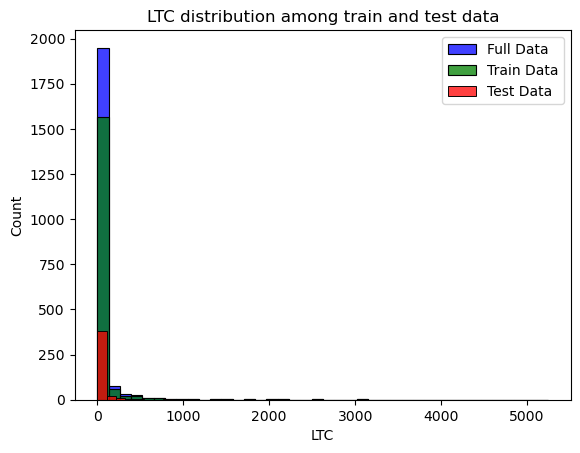

In [15]:
# converting input data into numpy array format.
input_features = df_scaled.to_numpy()
output_property = y.to_numpy()

##Vizualizing the split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_features, output_property, test_size=0.2, random_state=90)
sns.histplot(data=y,color="b",bins=40,kde=False,legend=True)
#plt.show();
sns.histplot(data=y_train,color = "g",bins=40,kde=False)
#plt.show();
sns.histplot(data=y_test,color="r",bins=40,kde=False)
plt.legend(['Full Data','Train Data','Test Data'])
plt.title('LTC distribution among train and test data')
plt.show();

#### Now, Data is ready to model training and validation:

#### 1. Random Forest

In [16]:
##RF Algorithm
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train,y_train)
print('Training Accuracy: {}'.format(rf_reg.score(X_train,y_train)))
print('Test Accuracy: {}'.format(rf_reg.score(X_test,y_test)))

Training Accuracy: 0.9893162952510478
Test Accuracy: 0.8906735677738726


Text(0.5, 1.0, 'Global Feature Importance;  \n Random Forest Model after one fit')

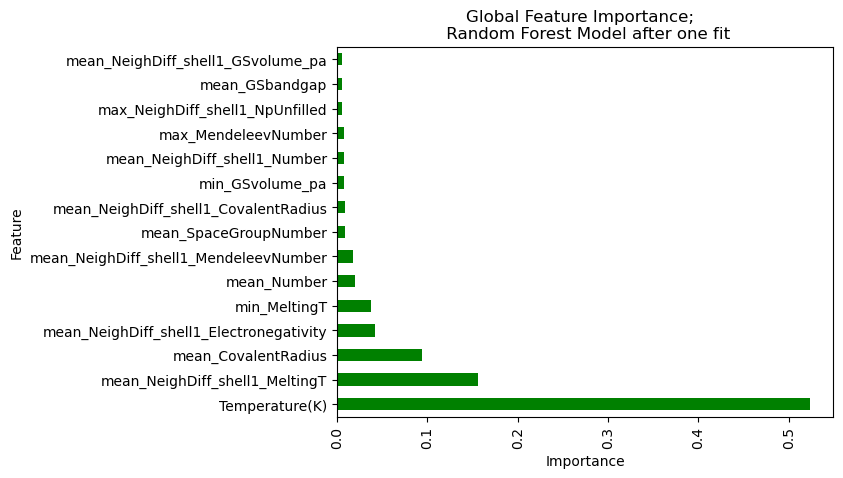

In [17]:
global_importances = pd.Series(rf_reg.feature_importances_, index=df_scaled.columns)
global_importances.sort_values(ascending=False, inplace=True)
global_importances[:15].plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.xticks(rotation = 90)
plt.title("Global Feature Importance;  \n Random Forest Model after one fit")

##### Cross-Validation (K-Fold) is performed to check model performance on different random sampling.

In [18]:
##Repeated K-fold

import time

start = time.time()

scores = []
counter = 0
from sklearn.model_selection import RepeatedKFold
fold = RepeatedKFold(n_splits = 10,n_repeats=10, random_state=30)
for train_index, test_index in fold.split(af_both2):
    counter = counter + 1
    X_train, X_test = af_both2.iloc[train_index], af_both2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_reg.fit(X_train,y_train)
    scores.append(rf_reg.score(X_test,y_test))
print(scores)

end = time.time()

print('Time taken (minutes) by code is ', (end-start)/60)

[0.968699034199431, 0.9538711860302763, 0.9628130221295372, 0.9680635919477025, 0.9544990320102551, 0.9827376978803021, 0.9946352158279959, 0.9374732485856212, 0.8939354924058791, 0.9907020236451441, 0.9645315682279412, 0.8521906965549668, 0.9763933808356277, 0.9241417177100759, 0.9807520106776458, 0.9777778123616436, 0.9608400192899103, 0.9590012422843532, 0.961674040296565, 0.9852649011531694, 0.9463441373281603, 0.957225006173018, 0.9280380099090533, 0.9503769868572314, 0.9596666526483422, 0.9713952467810079, 0.961073894545498, 0.9765295738274462, 0.9851739513940178, 0.9646821352150008, 0.8986889698403471, 0.9783007055792595, 0.9469217526849281, 0.9264445169350134, 0.9624105269941238, 0.971697391469645, 0.9678834248953956, 0.9417674731110048, 0.97751464928415, 0.9837753296852744, 0.9802607817892741, 0.9511022614559054, 0.9328949300180415, 0.8868272630761512, 0.9373277242438885, 0.9560155535590781, 0.9524746994303923, 0.9887589233837151, 0.9401245167104364, 0.9725661949248544, 0.9352

In [19]:
## Average R2 Score: 
RF_R2Score = np.array(scores).mean()
print('Average R2 score is : ',np.array(scores).mean())

Average R2 score is :  0.9544010090624808


Text(0.5, 1.0, 'Global Feature Importance:  \n Random Forest Model after Cross Validation')

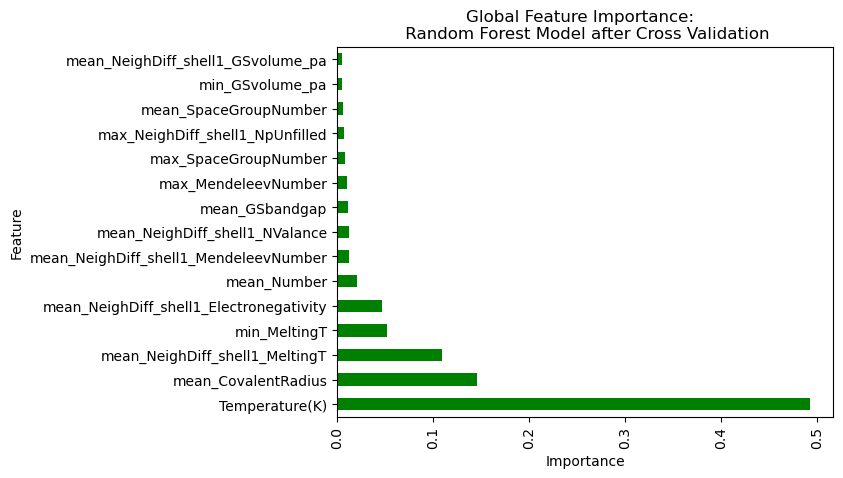

In [20]:
global_importances = pd.Series(rf_reg.feature_importances_, index=df_scaled.columns)
global_importances.sort_values(ascending=False, inplace=True)
global_importances[:15].plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.xticks(rotation = 90)
plt.title("Global Feature Importance:  \n Random Forest Model after Cross Validation")

##### 2. Decision Tree

In [21]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train,y_train)
print('Training Accuracy (Decision Tree): {}'.format(dt_reg.score(X_train,y_train)))
print('Test Accuracy (Decision Tree): {}'.format(dt_reg.score(X_test,y_test)))

Training Accuracy (Decision Tree): 0.9994531631632256
Test Accuracy (Decision Tree): 0.9145018405078928


In [22]:
##Repeated K-fold

import time

start = time.time()

scores = []
counter = 0
from sklearn.model_selection import RepeatedKFold
fold = RepeatedKFold(n_splits = 10,n_repeats=10, random_state=30)
for train_index, test_index in fold.split(af_both2):
    counter = counter + 1
    X_train, X_test = af_both2.iloc[train_index], af_both2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    dt_reg.fit(X_train,y_train)
    scores.append(dt_reg.score(X_test,y_test))
print(scores)

end = time.time()

print('Time taken (minutes) by code is ', (end-start)/60)

[0.9333506996992181, 0.9682708311620034, 0.9586768195430928, 0.9675864301675802, 0.9682981265013056, 0.964779810698828, 0.9499243467245498, 0.9477687880405602, 0.8955639564586367, 0.9298050976386539, 0.8649092861070552, 0.9533720062315969, 0.9667613206368053, 0.9360573820601821, 0.965341621645711, 0.9588427854232021, 0.9534548625900738, 0.9426229272620505, 0.9824647770634382, 0.984917255467018, 0.9285973434827306, 0.9391522993505834, 0.9715911215213698, 0.9572007162319155, 0.9742584110155404, 0.9485883534641567, 0.939829261737445, 0.9356272290147593, 0.9880129578605233, 0.8992500048942271, 0.9521118946779976, 0.9765926327116898, 0.9299307433209327, 0.7537108466066278, 0.9395633718171986, 0.9647617681819136, 0.9630271890567247, 0.9364619950142674, 0.951797198022319, 0.9597113324081251, 0.9722926035490482, 0.9078669400648051, 0.9300281565207458, 0.7194217081190228, 0.9465927974722596, 0.9753757718891263, 0.9643379687026719, 0.9818600481607804, 0.9343140074977856, 0.9781682294637702, 0.87

In [23]:
## Average R2 Score: 
DT_R2Score = np.array(scores).mean()
print('Average R2 score is : ',np.array(scores).mean())

Average R2 score is :  0.9397445136504093


Text(0.5, 1.0, 'Global Feature Importance:  \n Decision Tree Model after Cross Validation')

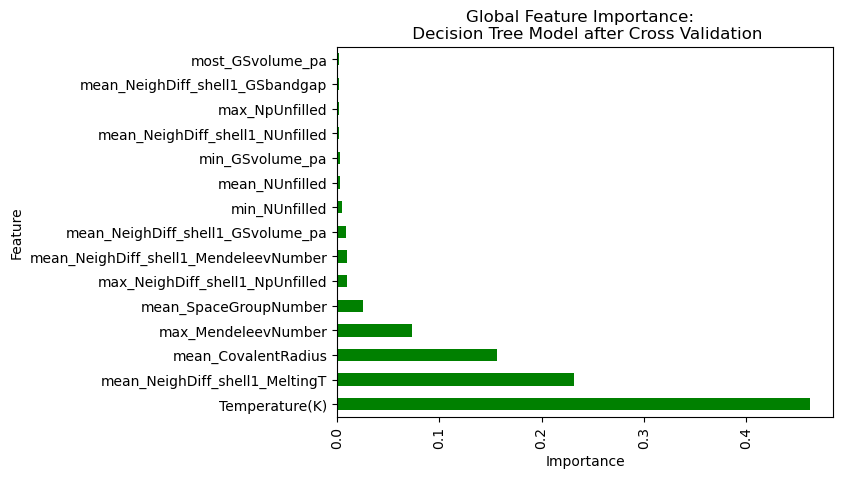

In [24]:
global_importances = pd.Series(dt_reg.feature_importances_, index=df_scaled.columns)
global_importances.sort_values(ascending=False, inplace=True)
global_importances[:15].plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.xticks(rotation = 90)
plt.title("Global Feature Importance:  \n Decision Tree Model after Cross Validation")

#### 3. XG Boost

In [45]:
from xgboost import XGBRegressor
# create an xgboost regression model
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train,y_train)
print('Training Accuracy (XG Boost): {}'.format(xgb_reg.score(X_train,y_train)))
print('Test Accuracy (XG Boost): {}'.format(xgb_reg.score(X_test,y_test)))

Training Accuracy (XG Boost): 0.9994355933725275
Test Accuracy (XG Boost): 0.9357874367809135


In [46]:
##Repeated K-fold
import time

start = time.time()

scores = []
counter = 0
from sklearn.model_selection import RepeatedKFold
fold = RepeatedKFold(n_splits = 10,n_repeats=10, random_state=30)
for train_index, test_index in fold.split(af_both2):
    counter = counter + 1
    X_train, X_test = af_both2.iloc[train_index], af_both2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    xgb_reg.fit(X_train,y_train)
    scores.append(xgb_reg.score(X_test,y_test))
print(scores)

end = time.time()
 
print('Time taken (minutes) by code is ', (end-start)/60)

[0.9767382736210952, 0.9772499193705363, 0.9580443614516767, 0.9858807492355511, 0.9406224635623545, 0.9791856318143171, 0.9864208746422497, 0.9645396942106662, 0.9659636042719134, 0.9742370627329675, 0.9357874367809135, 0.9692234829999087, 0.9760543444968883, 0.9523554891974113, 0.8609171797854388, 0.9908805535633162, 0.9554587547466877, 0.9665374320967841, 0.9399419375116357, 0.9793327212650594, 0.937043907932246, 0.972895426669921, 0.904375628879924, 0.9691192695558815, 0.9739364843160128, 0.9866709689280462, 0.9599240143742211, 0.9594314903007459, 0.9660810903641809, 0.9668350212189886, 0.9267243898978469, 0.8641605675239179, 0.9239826244556184, 0.9461745728088896, 0.9482061794734421, 0.9781351503256359, 0.987745621560041, 0.9588316843729697, 0.9665494275613935, 0.9552703209633764, 0.9937326832527155, 0.9516388714540005, 0.9388358807554834, 0.9523793832272727, 0.9448368279043304, 0.9885956354066144, 0.9644924544551228, 0.9772821019304528, 0.9301134704155982, 0.8957149373455378, 0.9

In [47]:
## Average R2 Score: 
XGB_R2Score = np.array(scores).mean()
print('Average R2 score of XGB is : ',np.array(scores).mean())

Average R2 score of XGB is :  0.9512837153998366


Text(0.5, 1.0, 'Global Feature Importance:  \n XGBoost Model after Cross Validation')

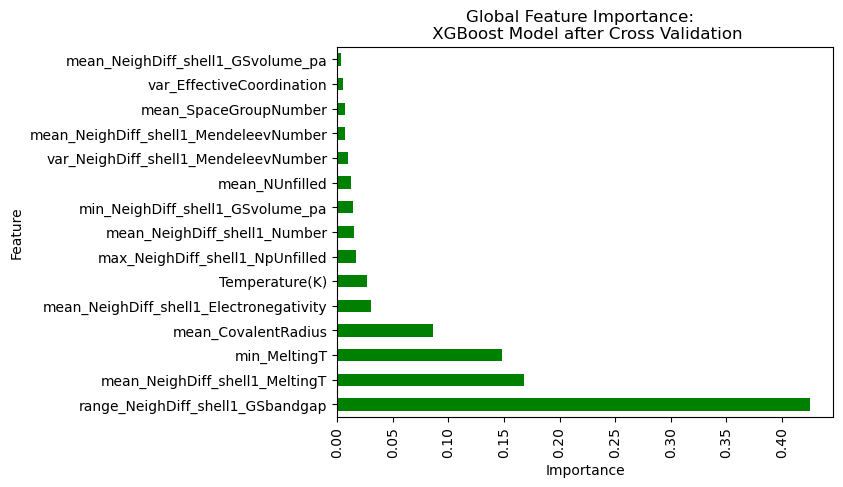

In [48]:
global_importances = pd.Series(xgb_reg.feature_importances_, index=df_scaled.columns)
global_importances.sort_values(ascending=False, inplace=True)
global_importances[:15].plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.xticks(rotation = 90)
plt.title("Global Feature Importance:  \n XGBoost Model after Cross Validation")

In [49]:
from joblib import Parallel, delayed 
import joblib 
#Save the model as a pickle in a file 
joblib.dump(xgb_reg, 'RF_Regression_LTC_XGB.pkl') 

['RF_Regression_LTC_XGB.pkl']

##### 4. Gradient Boosting Regressor Tree (GBRT) 

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_reg = GradientBoostingRegressor(random_state=42)
gbr_reg.fit(X_train,y_train)
print('Training Accuracy (Gradient Boosting Regressor): {}'.format(gbr_reg.score(X_train,y_train)))
print('Test Accuracy (Gradient Boosting Regressor): {}'.format(gbr_reg.score(X_test,y_test)))

Training Accuracy (Gradient Boosting Regressor): 0.9915068545097364
Test Accuracy (Gradient Boosting Regressor): 0.9114034378189757


In [28]:
##Repeated K-fold

import time

start = time.time()

scores = []
counter = 0
from sklearn.model_selection import RepeatedKFold
fold = RepeatedKFold(n_splits = 10,n_repeats=10, random_state=30)
for train_index, test_index in fold.split(af_both2):
    counter = counter + 1
    X_train, X_test = af_both2.iloc[train_index], af_both2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    gbr_reg.fit(X_train,y_train)
    scores.append(gbr_reg.score(X_test,y_test))
print(scores)

end = time.time()

print('Time taken (minutes) by code is ', (end-start)/60)

[0.9796077345641633, 0.9346111378981571, 0.9589570124980867, 0.7109451677294358, 0.895149910824671, 0.9489682431734306, 0.9778233020404016, 0.922325460535117, 0.9632411260459233, 0.9691992762906498, 0.913652655599971, 0.9697694615680948, 0.962946459681985, 0.9554200543364388, 0.8442742672421453, 0.9778203993299782, 0.9325577021958044, 0.9570938476690054, 0.8299233123071607, 0.9768347461871527, 0.9285955681251542, 0.9626608775992604, 0.8846182321231927, 0.9349600452415444, 0.9588248552507512, 0.9818736330212645, 0.9661689182461599, 0.9865377038670692, 0.9304559714004307, 0.9509226023095642, 0.908334866342381, 0.8581858168015436, 0.9631094627385914, 0.9197693017927884, 0.9725757121304907, 0.9744672076687734, 0.9675697544212687, 0.928463475897912, 0.9697209712190478, 0.9350041091019622, 0.9777284055542331, 0.9412931865593074, 0.850806901315564, 0.9291864643955396, 0.9437937337260425, 0.9610769329002299, 0.9337549446986896, 0.9801551721406798, 0.9021330452946503, 0.7856633051974101, 0.9324

In [29]:
## Average R2 Score: 
GBR_R2Score = np.array(scores).mean()
print('Average R2 score of GBR is : ',GBR_R2Score)

Average R2 score of GBR is :  0.9348840025125047


Text(0.5, 1.0, 'Global Feature Importance:  \n Gradient Boosting Regression Tree Model after Cross Validation')

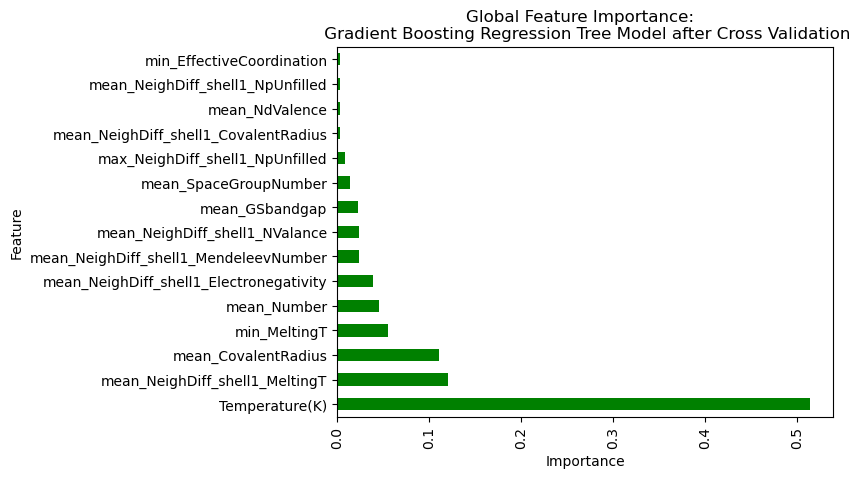

In [30]:
global_importances = pd.Series(gbr_reg.feature_importances_, index=df_scaled.columns)
global_importances.sort_values(ascending=False, inplace=True)
global_importances[:15].plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.xticks(rotation = 90)
plt.title("Global Feature Importance:  \n Gradient Boosting Regression Tree Model after Cross Validation")

##### 5. Decision Tree Bagging Regressor (DT-Bag) 

In [31]:
from sklearn.ensemble import BaggingRegressor
DTBag_reg = BaggingRegressor(random_state=42)
DTBag_reg.fit(X_train,y_train)
print('Training Accuracy (DT Bagging Regressor): {}'.format(DTBag_reg.score(X_train,y_train)))
print('Test Accuracy (DT Bagging Regressor): {}'.format(DTBag_reg.score(X_test,y_test)))

Training Accuracy (DT Bagging Regressor): 0.9923871962700662
Test Accuracy (DT Bagging Regressor): 0.9475536332614485


In [32]:
##Repeated K-fold

import time

start = time.time()

scores = []
counter = 0
from sklearn.model_selection import RepeatedKFold
fold = RepeatedKFold(n_splits = 10,n_repeats=10, random_state=30)
for train_index, test_index in fold.split(af_both2):
    counter = counter + 1
    X_train, X_test = af_both2.iloc[train_index], af_both2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    DTBag_reg.fit(X_train,y_train)
    scores.append(DTBag_reg.score(X_test,y_test))
print(scores)

end = time.time()

print('Time taken (minutes) by code is ', (end-start)/60)

[0.9569406734917922, 0.9436193983688026, 0.9653402058376157, 0.9841690236450558, 0.9486283538296574, 0.9554941920085457, 0.9822111653973497, 0.9475027292894418, 0.8465148938072942, 0.9858154605392924, 0.9444455607091509, 0.9167555550243995, 0.9447090911598695, 0.9191679303509996, 0.9462124294728335, 0.9768190058262582, 0.9924751614224658, 0.9613643573722552, 0.9783839502555259, 0.9833359388657469, 0.9741098863485267, 0.9395605074407897, 0.945056941400914, 0.8868387062102197, 0.9724464200688244, 0.9540144301231245, 0.9580767189877817, 0.9422664154847894, 0.9808412888414046, 0.9672196796557011, 0.9295862133798329, 0.7967223393861378, 0.9205587246681044, 0.9591386114630502, 0.9019335783088992, 0.9470060437988128, 0.9708623914183099, 0.9764613603416239, 0.969874817982432, 0.9794652690344395, 0.959287639515549, 0.9397648025812925, 0.900514537176391, 0.8319264920155558, 0.9069566923863115, 0.9598382413439834, 0.9470629346668779, 0.9672318073334198, 0.8902418022049945, 0.9907017534490833, 0.9

In [33]:
## Average R2 Score: 
DTBag_R2Score = np.array(scores).mean()
print('Average R2 score of GBR is : ',DTBag_R2Score)

Average R2 score of GBR is :  0.9342461373924578


In [39]:
# global_importances = pd.Series(DTBag_reg.feature_importances_, index=df_scaled.columns)
# global_importances.sort_values(ascending=False, inplace=True)
# global_importances[:15].plot.barh(color='green')
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.xticks(rotation = 90)
# plt.title("Global Feature Importance:  \n Gradient Boosting Regression Tree Model after Cross Validation")

##### 6. Decision Tree Adaboosting Regressor (DT-Ada) 

In [40]:
from sklearn.ensemble import AdaBoostRegressor
DTAda_reg = AdaBoostRegressor(random_state=42)
DTAda_reg.fit(X_train,y_train)
print('Training Accuracy (DT Adaboost Regressor): {}'.format(DTAda_reg.score(X_train,y_train)))
print('Test Accuracy (DT Adaboost Regressor): {}'.format(DTAda_reg.score(X_test,y_test)))


Training Accuracy (DT Adaboost Regressor): 0.8887213461677249
Test Accuracy (DT Adaboost Regressor): 0.813456833012592


In [41]:
##Repeated K-fold

import time

start = time.time()

scores = []
counter = 0
from sklearn.model_selection import RepeatedKFold
fold = RepeatedKFold(n_splits = 10,n_repeats=10, random_state=30)
for train_index, test_index in fold.split(af_both2):
    counter = counter + 1
    X_train, X_test = af_both2.iloc[train_index], af_both2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    DTAda_reg.fit(X_train,y_train)
    scores.append(DTAda_reg.score(X_test,y_test))
print(scores)

end = time.time()

print('Time taken (minutes) by code is ', (end-start)/60)

[0.8170864613507518, 0.6335001558333299, 0.6382269489910153, 0.03376232853583083, 0.8492630377075038, 0.7990782543980871, 0.6511924936763196, 0.8716828138754211, 0.9216054496389801, 0.07533638823129962, 0.7329854477755492, 0.7496207998605957, 0.651291138577253, 0.9176153660790434, 0.7154541673625199, 0.7588383295969974, 0.8117512569312736, 0.8477764268886184, 0.5328307817332999, 0.7415012373856477, 0.8294381571564347, 0.6619554541630672, 0.8561386166689429, 0.8322107335623343, 0.7859896919988507, 0.5957184861009375, 0.7559365953848799, 0.8378257778118544, 0.5849557241209333, 0.8697564054916547, 0.6355353357084597, 0.7667343830721393, 0.7308582495218918, 0.8934789113089261, 0.7368087018163058, 0.755941404692416, 0.6267157370984158, 0.7643659510867994, 0.7736970935013254, 0.6980997246932589, 0.754380747030979, 0.8118373436322657, 0.4611002792065968, 0.8769164298535466, 0.753607976081963, 0.6401785483150386, 0.8199625769985508, 0.6326838736566411, 0.8406422077147879, 0.6217265785809731, 0

In [42]:
## Average R2 Score: 
DTAda_R2Score = np.array(scores).mean()
print('Average R2 score of GBR is : ',DTAda_R2Score)

Average R2 score of GBR is :  0.7188024174683478


Text(0.5, 1.0, 'Global Feature Importance:  \n Gradient Boosting Regression Tree Model after Cross Validation')

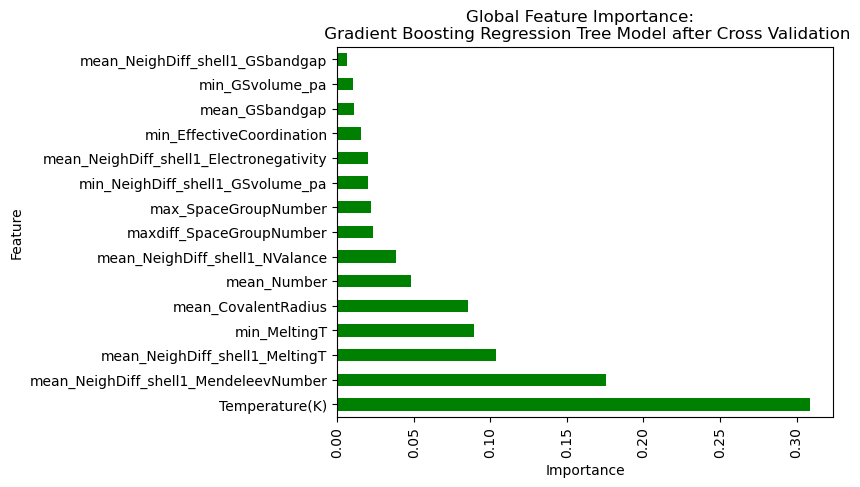

In [43]:
global_importances = pd.Series(DTAda_reg.feature_importances_, index=df_scaled.columns)
global_importances.sort_values(ascending=False, inplace=True)
global_importances[:15].plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.xticks(rotation = 90)
plt.title("Global Feature Importance:  \n Gradient Boosting Regression Tree Model after Cross Validation")

#### Comparison of different model's performances: (R2 Score and relative Computational Cost)

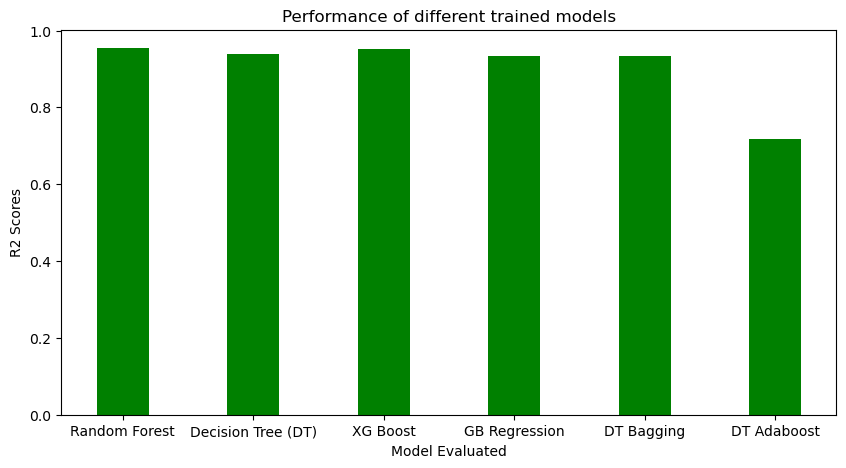

In [56]:
R2_scores = {'Random Forest':RF_R2Score,'Decision Tree (DT)':DT_R2Score,'XG Boost':XGB_R2Score,'GB Regression':GBR_R2Score,
             'DT Bagging':DTBag_R2Score,'DT Adaboost':DTAda_R2Score}
r2_scores = list(R2_scores.values())
model_names = list(R2_scores.keys())

fig = plt.figure(figsize = (10,5))
plt.bar(model_names,r2_scores,color = 'green',width=0.4)
plt.xlabel('Model Evaluated')
plt.ylabel('R2 Scores')
plt.xticks()
plt.title('Performance of different trained models')
plt.show() 

### Part-3: Dumping Trained Model for application development 

In [56]:
from joblib import Parallel, delayed 
import joblib 
# joblib.dump(rf_reg, 'RF_Regression_LTC.pkl')

In [60]:
#Save the model as a pickle in a file 
# joblib.dump(rf_reg, 'RF_Regression_LTC.pkl')   

In [61]:
# Load the model from the file 
RF_Reg_LTC = joblib.load('RF_Regression_LTC.pkl') 
# RF_Reg_log_LTC = joblib.load('RF_Regression_log(LTC).pkl') 